In [2]:
from data_formats import read_data
from dose_reponse_fit import dose_response_fit, StandardSettings
import matplotlib.pyplot as plt
from plotting import *
from stress_survival_conversion import stress_to_survival, survival_to_stress
import random
import glob
from tqdm import tqdm
import pandas as pd
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


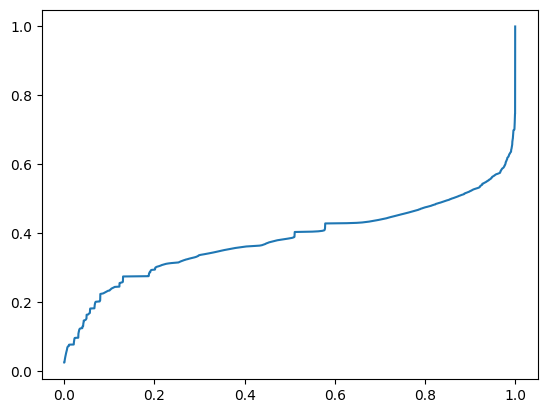

In [3]:
df = pd.read_csv("learned_distribution.csv")

x = df.right_borders.values[:, None]
y = np.cumsum(df.probs).values
plt.plot(x,y)
plt.show()

In [26]:
pysr_model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp", "log", "tanh", "sqrt", "inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
    niterations=100,  # Adjust depending on the complexity of your function
    populations=50,   # More populations to better explore the equation space
    progress=True,     # Display progress bar
    random_state = False,
)

x = df.right_borders.values[:, None]
y = np.cumsum(df.probs).values


pysr_model.fit(x, y)

[ Info: Started!



Expressions evaluated per second: 2.100e+04
Head worker occupation: 9.7%
Progress: 47 / 5000 total iterations (0.940%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.447e-02  7.971e+00  y = tanh(0.37324)
3           7.027e-03  7.226e-01  y = tanh(tanh(x₀))
4           4.389e-03  4.707e-01  y = tanh(tanh(tanh(x₀)))
5           8.772e-04  1.610e+00  y = tanh(sqrt(x₀ * 0.37324))
8           8.413e-04  1.390e-02  y = tanh(sqrt(x₀ / exp(tanh(exp(x₀)))))
9           7.970e-04  5.411e-02  y = tanh(sqrt(x₀ / exp(tanh(exp(sqrt(x₀))))))
10          7.218e-04  9.912e-02  y = sqrt(x₀) / (sqrt(exp(0.27272)) + tanh(sqrt(x₀)))
11          7.131e-04  1.212e-02  y = sqrt(x₀) / (sqrt(exp(0.58377)) + tanh(tanh(tanh(x₀))))
12          4.549e-04  4.495e-01  y = tanh(tanh(tanh(sqrt(exp(log(x₀) * (exp(x₀) + x₀))))))
14          3.910e-04  7.565e-02  y = tanh(exp((exp(exp(x₀ - inv(x₀))) 

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          0.3993924   
	1         0.020882                                    tanh(0.4027758)   
	2         0.676616                                     tanh(tanh(x0))   
	3         1.900120                               sqrt(x0) / 1.7738394   
	4         0.181429                          tanh(sqrt(x0 / 2.692194))   
	5         0.255745                   (sqrt(x0) * 0.486554) + 0.057896   
	6         0.049729        inv(log(inv(x0)) + 1.6697814) - 0.031690534   
	7         1.341560          tanh(inv(sqrt(inv(x0) - x0) + 1.2276471))   
	8         0.095860   tanh(inv(sqrt(inv(x0) - (x0 * x0)) + 1.1414489))   
	9         0.048174  tanh(inv(sqrt(inv(x0) - x0) + sqrt(x0)) / 1.24...   
	10        0.102630  tanh(inv(1.1812416 * (sqrt(inv(x0) - x0) + sqr...   
	11  >>>>  0.195498  tanh(inv(1.1812416 * ((sqrt(inv(x0) - x0) / 0....   
	12        0.180021  0.87608135 * inv(sqrt(inv(x0)) + sqrt(sqrt(sqr...   
	13        0.106594  (-0.5066333 * -1.6460458) * inv(sqrt(inv(x0)) ...   
	14        0.000547  (-1.6463317 * -0.50755954) * inv(sqrt(sqrt(x0 ...   
	15        0.007556  (-1.6463317 * -0.50755954) * inv(sqrt(inv(x0))...   
	16        0.036045  tanh(inv(sqrt(sqrt(((inv(x0) / x0) - x0) * 2.0...   
	
	        loss  complexity  
	0   0.014115           1  
	1   0.013823           2  
	2   0.007027           3  
	3   0.001051           4  
	4   0.000876           5  
	5   0.000679           6  
	6   0.000614           8  
	7   0.000161           9  
	8   0.000133          11  
	9   0.000126          12  
	10  0.000114          13  
	11  0.000094          14  
	12  0.000078          15  
	13  0.000070          16  
	14  0.000070          18  
	15  0.000070          19  
	16  0.000067          20  
]

In [19]:
pysr_model_padded = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp", "log", "tanh", "sqrt", "inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
    niterations=100,  # Adjust depending on the complexity of your function
    populations=50,   # More populations to better explore the equation space
    progress=True,     # Display progress bar
    random_state = False,
)

x = df.right_borders.values
y = np.cumsum(df.probs).values
x_padded = np.concatenate((np.linspace(-1,0,1000), x, np.linspace(1,2,1000)))[:,None]
y_padded = np.concatenate((np.zeros_like(np.linspace(1,2,1000)), y, np.ones_like(np.linspace(1,2,1000))))


pysr_model_padded.fit(x_padded, y_padded)

[ Info: Started!



Expressions evaluated per second: 9.670e+03
Head worker occupation: 6.8%
Progress: 22 / 5000 total iterations (0.440%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           4.774e-02  7.971e+00  y = tanh(x₀)
3           4.420e-02  7.710e-02  y = tanh(tanh(x₀))
4           3.430e-02  2.535e-01  y = tanh(x₀ / 1.3304)
5           1.582e-02  7.740e-01  y = exp(x₀ - inv(0.64828))
7           1.259e-02  1.142e-01  y = tanh(exp(x₀ + inv(tanh(-0.94973))))
10          1.216e-02  1.145e-02  y = ((x₀ - (tanh(-0.94783) - x₀)) + x₀) * 0.17666
11          1.184e-02  2.742e-02  y = tanh((x₀ - -0.17374) * tanh((x₀ * 0.37229) - -0.34795))
12          1.019e-02  1.499e-01  y = tanh(exp(inv(tanh(-0.73113 - (x₀ * tanh(x₀)))) + x₀))
13          6.350e-03  4.727e-01  y = tanh(exp(inv(tanh(inv(inv(-0.59031)) - (x₀ * 0.54426))) + ...
                                  x₀))
16          6.318e-03  1

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         0.39400098   
	1         0.572316                                           tanh(x0)   
	2         0.428131                                    0.60418624 * x0   
	3         0.697582                                  exp(x0) * 0.20873   
	4         0.500719                      0.4500078 * (x0 + 0.42421827)   
	5         0.293395                     tanh(exp(exp(x0) - 2.7612722))   
	6         0.164202             tanh(0.15961422 * exp(x0 / 0.5938308))   
	7         0.075940         tanh(-1.127704 + sqrt(sqrt(exp(exp(x0)))))   
	8         0.001999  tanh((-1.1334844 + exp(exp(x0 - 1.3189734))) *...   
	9         0.528905  tanh(exp(x0 + inv(tanh(tanh(inv(-0.9999995 + x...   
	10        0.684554  tanh((0.6501973 + x0) * exp(inv(tanh(inv(-0.99...   
	11        0.004495  tanh((0.64257365 + x0) * exp(0.9946129 / tanh(...   
	12        0.278142  tanh((0.64257365 + x0) * exp(inv(tanh(exp(x0) ...   
	13        0.064825  tanh((0.64257365 + x0) * exp(inv(tanh(exp(x0 +...   
	14        0.821363  tanh(sqrt((sqrt(x0 * x0) + x0) * 1.2809308) * ...   
	15        0.272721  tanh(exp(((tanh(inv(-0.9999995 + x0)) - inv(ex...   
	16  >>>>  0.285386  tanh(exp(((tanh(inv(tanh(-0.9999995 + x0))) - ...   
	
	        loss  complexity  
	0   0.084610           1  
	1   0.047738           2  
	2   0.031112           3  
	3   0.015487           4  
	4   0.009387           5  
	5   0.007000           6  
	6   0.005940           7  
	7   0.005506           8  
	8   0.005484          10  
	9   0.003231          11  
	10  0.001630          12  
	11  0.001622          13  
	12  0.001228          14  
	13  0.001079          16  
	14  0.000475          17  
	15  0.000361          18  
	16  0.000272          19  
]

In [33]:
pysr_model.sympy()

tanh(1/(1.1812416*sqrt(x0) + 1.29124678757377*sqrt(-x0 + 1/x0)))

In [36]:
expr = psyr_model.sympy()

import sympy as sp

x0 = sp.Symbol('x0')
y = sp.Symbol('y')

inverted_expr = sp.solve(sp.Eq(expr, y), x0)

In [20]:
from autora.theorist.bms import BMSRegressor

temperatures = [1.0] + [1.04**k for k in range(1, 20)]

bms_estimator = BMSRegressor(
    epochs=1000,
    ts=temperatures,
)

x = df.right_borders.values[:, None]
y = np.cumsum(df.probs).values

bms_estimator.fit(x_padded,y_padded)

INFO:autora.theorist.bms.regressor:BMS fitting started
100%|██████████| 1000/1000 [02:28<00:00,  6.75it/s]
INFO:autora.theorist.bms.regressor:BMS fitting finished


sig(((((X0 ** 3) ** 3) ** 3) + (((((X0 + -0.64) + -0.64) + X0) ** 3) + (-0.64 ** 3))))

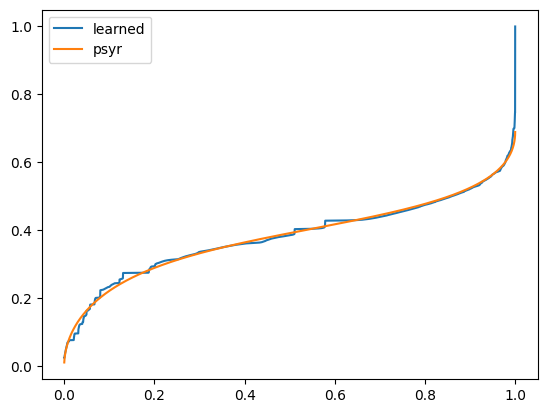

In [31]:
x = df.right_borders.values[:, None]
y = np.cumsum(df.probs).values
plt.plot(x,y, label = "learned")

y_pred = pysr_model.predict(x)
plt.plot(x,y_pred, label = "psyr")

# y_pred = pysr_model_padded.predict(x)
# plt.plot(x,y_pred, label = "psyr padded")

# y_pred = bms_estimator.predict(x)
# plt.plot(x,y_pred, label = "bms")



plt.legend()
plt.show()